# Họ và Tên: Vũ Đoàn Khánh Linh
# MSSV: 2070ct657680

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


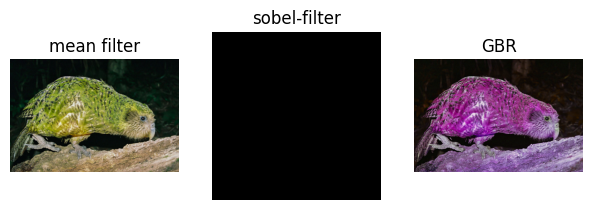

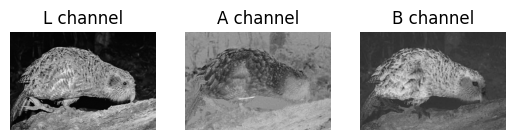

In [31]:
import os
import imageio.v2 as iio
import numpy as np
import scipy.ndimage as sn
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage import color
from scipy.ndimage import uniform_filter
from skimage import filters

img = iio.imread('exercise/bai1.jpg')

# Áp dụng mean filter (mặc định size=3)
if img.ndim == 3:  # Ảnh màu
    filtered_img = np.zeros_like(img)
    for c in range(3):  # Lọc từng kênh R, G, B
        filtered_img[:, :, c] = uniform_filter(img[:, :, c], size=3)
else:  # Ảnh xám
    filtered_img = uniform_filter(img, size=3)
# Lưu ảnh
plt.figure(figsize=(10,3))
plt.subplot(1, 4, 1)
iio.imsave('bai1-meanfilter.jpg',filtered_img)
plt.title('mean filter')
plt.imshow(filtered_img)
plt.axis('off')


# xác định biên (Sobel filter)
imgsobel = iio.imread('exercise/ca.jpg')
sobel = filters.sobel(imgsobel).astype(np.uint8)
plt.subplot(1, 4, 2)
iio.imsave('bai1-sobelfilter.jpg', sobel)
plt.title('sobel-filter')
plt.imshow(sobel)
plt.axis('off')

# Đổi thứ tự màu (RGB->GBR)
GRB = [0,1,2]
swapped = np.zeros_like(img)
swapped[:, :, 0] = img[:, :, 1]  
swapped[:, :, 1] = img[:, :, 2]  
swapped[:, :, 2] = img[:, :, 0]  
iio.imwrite('bai1_swapped.jpg', swapped)
plt.subplot(1, 4, 3)
iio.imsave('bai1-swapped.jpg', swapped)
plt.title("GBR")
plt.imshow(swapped)
plt.axis('off')
plt.show()

#chuyển ảnh sang LAB và tách 3 kênh màu L,A,B lưu thành ảnh xám
lab_img = color.rgb2lab(img)
L = lab_img[:, :, 0]
A = lab_img[:, :, 1]
B = lab_img[:, :, 2]

L_norm = ((L - L.min()) / (L.max() - L.min()) * 255).astype(np.uint8)
A_norm = ((A - A.min()) / (A.max() - A.min()) * 255).astype(np.uint8)
B_norm = ((B - B.min()) / (B.max() - B.min()) * 255).astype(np.uint8)
iio.imsave('bai1_L.jpg', L_norm)
plt.subplot(1, 3, 1)
plt.title("L channel")
plt.imshow(L_norm, cmap='gray')
plt.axis('off')
iio.imsave('bai1_A.jpg', A_norm)
plt.subplot(1, 3, 2)
plt.title("A channel")
plt.imshow(A_norm, cmap='gray')
plt.axis('off')
iio.imsave('bai1_B.jpg', B_norm)
plt.subplot(1, 3, 3)
plt.title("B channel")
plt.imshow(B_norm, cmap='gray')
plt.axis('off')
plt.show()


### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


 Đã lưu ảnh: result_median5_bai2-1.jpg


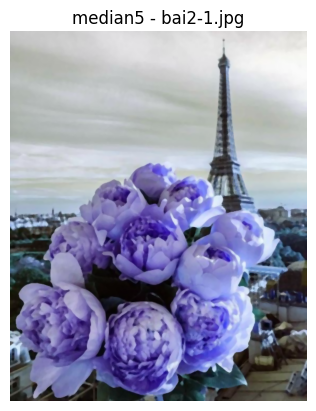

 Đã lưu ảnh: result_median5_bai2-2.jpg


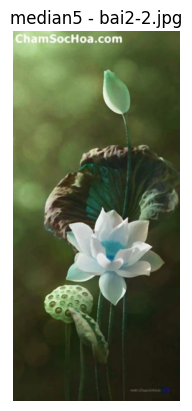

 Đã lưu ảnh: result_median11_bai2-3.jpg


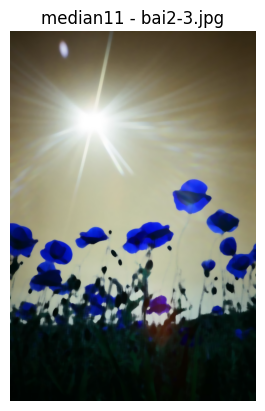

In [ ]:
import cv2
import random
import os

# bai1-menu

def apply_gaussian_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    return cv2.GaussianBlur(img, (k, k), 0), f'blur{k}'

def apply_median_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    return cv2.medianBlur(img, k), f'median{k}'

def apply_bilateral_filter(img):
    d = random.randint(5, 15)
    return cv2.bilateralFilter(img, d, 75, 75), f'bilateral{d}'

def apply_canny(img):
    t1 = random.randint(50, 100)
    t2 = random.randint(t1+10, 150)
    return cv2.Canny(img, t1, t2), f'canny{t1}_{t2}'
def apply_erosion(img):
    k = random.choice([2, 3, 4, 5])
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))
    return cv2.erode(img, kernel), f'erosion{k}x{k}'

def apply_dilation(img):
    k = random.choice([2, 3, 4, 5])
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))
    return cv2.dilate(img, kernel), f'dilation{k}x{k}'


operations = {
    'B': apply_gaussian_blur,
    'M': apply_median_blur,
    'F': apply_bilateral_filter,
    'E': apply_canny,
    'R': apply_erosion,
    'D': apply_dilation
}

image_paths = ['exercise/bai2-1.jpg', 'exercise/bai2-2.jpg', 'exercise/bai2-3.jpg']

choice = input("Nhập lựa chọn (B/M/F/E/R/D): ").upper()
while key not in operations:
    key = input("Phím không hợp lệ, nhập lại: ").upper()

for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        print(f" Không đọc được ảnh: {path}")
        continue

    process_func = operations[key]
    result_img, method_name = process_func(img)

    base_name = os.path.basename(path)
    output_name = f'result_{method_name}_{base_name}'
    cv2.imwrite(output_name, result_img)
    print(f" Đã lưu ảnh: {output_name}")

    # Hiển thị ảnh kết quả
    plt.imshow(result_img, cmap='gray' if len(result_img.shape) == 2 else None)
    plt.title(f"{method_name} - {base_name}")
    plt.axis('off')
    plt.show()


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


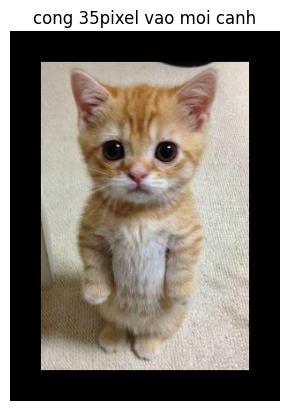

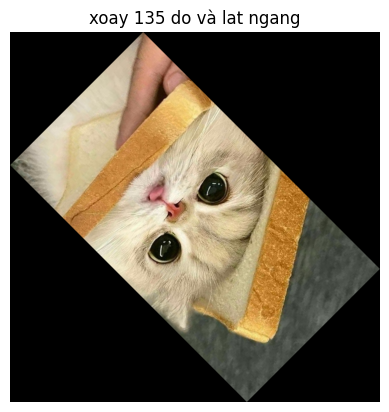

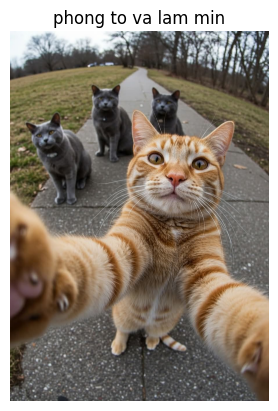

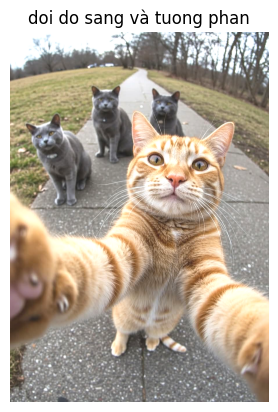

In [28]:
from PIL import Image, ImageOps
import numpy as np
import random
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

img1 = Image.open('exercise/bai3-1.jpg')
img2 = Image.open('exercise/bai3-2.jpg')
img3 = Image.open('exercise/bai3-3.jpg')

from PIL import Image, ImageOps
import numpy as np
import random
from scipy.ndimage import gaussian_filter

padded_img1 = ImageOps.expand(img1, border=35, fill='black')
padded_img1.save('Cong35pixel_bai3-1.jpg')
plt.imshow(padded_img1)
plt.title('cong 35pixel vao moi canh')
plt.axis('off')
plt.show()

rotated_img2 = img2.rotate(135, expand=True)
flipped_img2 = ImageOps.mirror(rotated_img2)

flipped_img2.save('xoay+lat_bai3-2.jpg')
plt.imshow(flipped_img2)
plt.title('xoay 135 do và lat ngang')
plt.axis('off')
plt.show()

w, h = img3.size
resized_img3 = img3.resize((w * 5, h * 5), Image.LANCZOS)

img3_np = np.array(resized_img3)
if img3_np.ndim == 3:  # ảnh màu
    blurred_np = np.zeros_like(img3_np)
    for c in range(3):
        blurred_np[:, :, c] = gaussian_filter(img3_np[:, :, c], sigma=2.0)
else:  # ảnh xám
    blurred_np = gaussian_filter(img3_np, sigma=2.0)

blurred_img3 = Image.fromarray(blurred_np.astype(np.uint8))

blurred_img3.save('phongto+min_bai3-3.jpg')
plt.imshow(blurred_img3)
plt.title('phong to va lam min')
plt.axis('off')
plt.show()

alpha = random.uniform(0.5, 2.0)
beta = random.randint(-50, 50)

adjusted_np = alpha * blurred_np + beta
adjusted_np = np.clip(adjusted_np, 0, 255).astype(np.uint8)

adjusted_img3 = Image.fromarray(adjusted_np)

adjusted_img3.save('sang+tuongphan_bai3-3.jpg')
plt.imshow(adjusted_img3)
plt.title('doi do sang và tuong phan')
plt.axis('off')
plt.show()




# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.